# 1.1) Description and Source of Data

http://www.gsea-msigdb.org/gsea/msigdb/genesets.jsp?collection=C6

This dataset contains 189 gene sets with 30,546 genes in total that were all up or downregulated in a cancer context. Our rationale is to look at all the genes that are highly downregulated in such a cancer environment as we consider these genes to be oncogenetic (genes that might induce cancer when inhibited) and therefore of high risk when targeted. 

The data is publicly available. However, one needs to register (it's for free) using a valid e-mail address before one can download any genesets on MSigDb web page. Based on the statements on the web the only purpose of signing up is to help them track the usage for reports to the funding agencies.

In [ ]:
# mount google drive to colab
from google.colab import drive
import os
n = 140
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone1/

print("###\n### {}".format(os.getcwd()))
print("#" * n)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
############################################################################################################################################
### colabs default working directory
###
### path: /content
############################################################################################################################################
### setted working directory
/content/drive/Shareddrives/MADS_Milestone1
###
### /content/drive/Shareddrives/MADS_Milestone1
############################################################################################################################################


**Strategy**

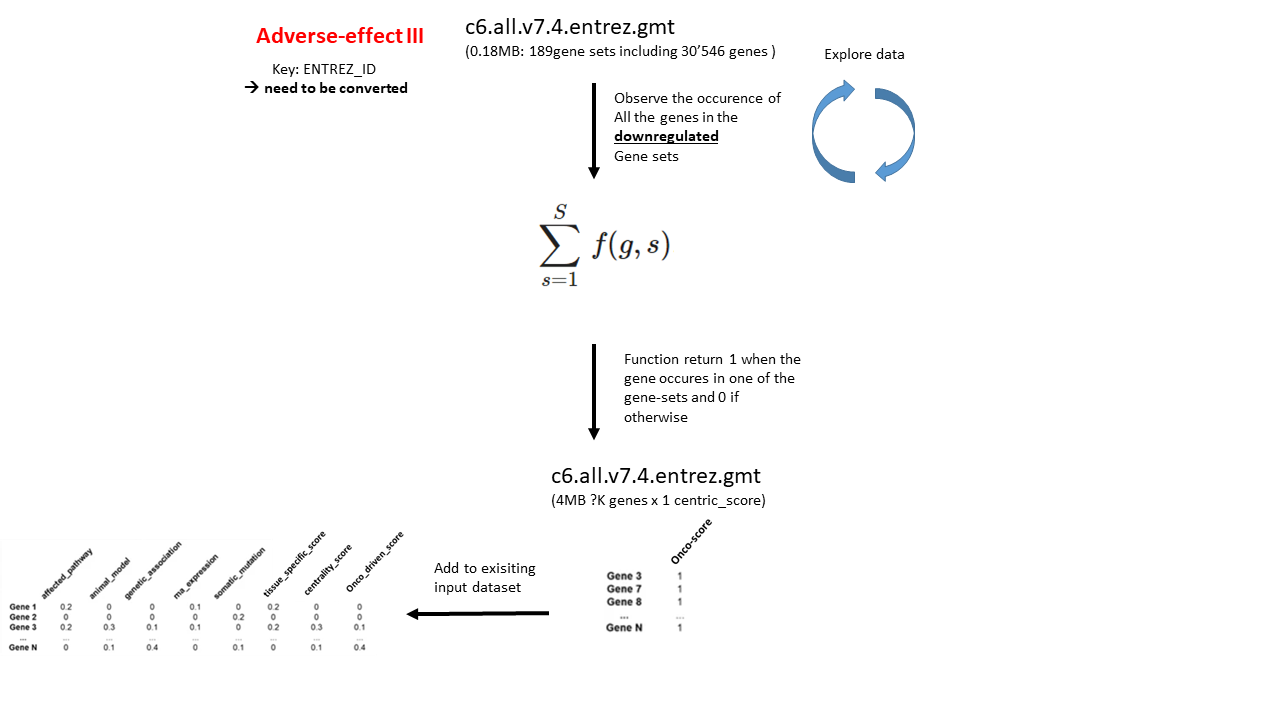

In [ ]:
from IPython.display import Image
Image('Visualizations/onco.png', width=900, height=500)


**Catching all the datasets in the working directory**

In [ ]:
import subprocess
import re

# define the ls command to find all results
ls = subprocess.Popen(["ls", "-p", "./Raw_Assets"],
                      stdout=subprocess.PIPE,
                     )

# define the grep command to exclude all folders
grep = subprocess.Popen(["grep", "-v", "/$"],
                        stdin=ls.stdout,
                        stdout=subprocess.PIPE,
                        )

# read from the end of the pipe (stdout)
endOfPipe = grep.stdout

json = {}
txt = {}
csv = {}
gmt = {}
all = []
path = "Raw_Assets/"
# output the files line by line
for line in endOfPipe:  
    
    w = re.sub( "\\\\n'$", "", str(line))
    w = re.sub("^b'", "", w)
    front = re.sub("\d+.", "", w)
    name = re.sub("\..*", "", front)

    all.append(w)
    if ".json" in w:        
        json[name] = path + w
    elif ".txt" in w or ".tsv" in w:
        txt[name] = path + w
    elif ".csv" in w:
        csv[name] = path + w
    else:
        gmt[name] = path + w
    
    
    
#     if (w[0] == "C") | (w[0] == "D"):
#         colnames.append(w)

# 2.1) Installing and Importing libraries

In [ ]:
# Importing libraries
!pip install gseapy
import gseapy
import re
import pandas as pd


     |████████████████████████████████| 532kB 5.4MB/s 
     |████████████████████████████████| 235kB 10.9MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 153kB 11.3MB/s 
     |████████████████████████████████| 5.6MB 16.8MB/s 
     |████████████████████████████████| 256kB 32.9MB/s 
  Created wheel for bioservices: filename=bioservices-1.7.11-cp37-none-any.whl size=236089 sha256=f5fb944950fd366aaffb08d457941d3b03238a18f1412b0992c41891608e319d
  Stored in directory: /root/.cache/pip/wheels/60/6c/61/1e0bf60bbf1c01bebc0b36f25aa94a4028474203414ed4088d
  Created wheel for easydev: filename=easydev-0.11.1-cp37-none-any.whl size=64252 sha256=00f70a38fb08ad853fb25d54d4f3572fb293755cf8dbe08d2beebdd87c892e4a
  Stored in directory: /root/.cache/pip/wheels/d8/1d/3b/4e589dff14dc2dce911de5c951c371c99e0da29f9f733dfbd2
  Created wheel for suds-jurko: filename=suds_jurko-0.6-cp37-none-any.whl size=454282 sha256=af0e05b25f3049d387d3f17a95c788aebaf6b770b6f

# 2.2) Creating Onco data dictionary

In [ ]:
# defining the onco data dictionary function

def set_onco_data(path):
  """ Description of the Function
  
  Providing a list of gene values for the Onco Gene sets

  Input --> File Path for geneset data

  Output --> dictionary for genesets and gene values

  """

  with open(path) as gmt:
      df = gmt.read().split()
  sets ={}
  for i in df:
      if bool(re.match("[\d]{1,}" , i)) != True:
          if bool(re.match("^http.*", i)) != True:
              key = i
      else:
          if key in sets.keys():
              sets[key] = sets[key] + [i]
          else:
              sets[key] = [i]
  sum([len(i) for i in sets.values()])

  return sets


sets=set_onco_data(gmt["call"])


# printing the onco data dictionary
print(sets)


{'GLI1_UP.V1_DN': ['143384', '81669', '54432', '79712', '23596', '6580', '9921', '861', '10801', '23607', '23305', '10771', '2348', '51645', '23344', '118663', '92521'], 'GLI1_UP.V1_UP': ['3489', '894', '5745', '51060', '4074', '9374', '6780', '3512', '29766', '56681', '7704', '4904', '6449', '7465', '373', '89927', '4867', '80173', '23683', '403313', '55527', '4008', '84310', '124245'], 'GCNP_SHH_UP_EARLY.V1_DN': ['23524', '56243', '1667', '8788', '5308', '6347', '105375355', '124925', '8148', '2012', '6450', '729230', '7409', '3965', '7456', '1130', '58528', '1374', '132720', '4125', '80014', '55787', '1260', '4879', '4645', '331', '3219', '23272', '5191', '54345', '9034', '2649', '10370', '4054', '80820', '6492', '1382', '8495', '1535', '10267', '4071', '286826', '444', '7343', '51604', '8320', '388646', '10461', '7786', '3554', '3037', '29015', '10951', '79411', '90102', '2842', '2990', '1427', '1628', '51542', '84978', '50717', '686', '115', '51804', '8399', '6532', '257144', '863

As we have described above - we are only interested in these gene sets that are highly downregulated when we are in a cancerous enviromment as we have defined these genes to be onco driven genes.

Therefore, we have filtered for only downregulated gene sets.

In [ ]:
# Filtering the 'sets' dictionary to only those genesets ending with 'DN' -stands for downregulated
print('Length of sets dicts',len(sets))

sets2={}

for i in sets.keys():
  # print(i)
  x=i.split('_')
  # print(x[-1])
  if x[-1]=='DN':
    sets2[i]=sets[i]


print('Length of sets2 dicts',len(sets2))


Length of sets dicts 189
Length of sets2 dicts 90


Output of filtering sets dict on genesets ending with 'DN'

We get 90 genesets from the original 189 Genesets

Next we need to convert all these entrezIDs to gene Symbols so that we can integrate it with the other datasets

In [ ]:
# Converting gene key to gene symbols

# Setting up the function
def convert_any_to_Symbol(ensembl=  ['ENSP00000000233', 
                                              'ENSP00000272298', 
                                              'ENSP00000253401'],
                                   which_ensembl = ['ensembl.protein', 
                                                    'ensembl.gene', 
                                                    'ensembl.transcript',
                                                    'entrezgene'][0], 
                                   species="human"):
  """ Description of the Function
  
  Providing a list of gene symbols for the Gene names

  Input --> List of Gene Names and type

  Output --> gene symbols

  """
  

  # check if mygene module is already installed
  import importlib
  exist_mygene = importlib.util.find_spec("mygene")
  if exist_mygene is None:
      !pip install mygene
  # import mygene module
  import mygene
  # set the connection to the mygene API
  mg = mygene.MyGeneInfo()
  # create the query
  q = mg.querymany(ensembl, scopes=which_ensembl, fields="ensembl,symbol", 
                   species=species, returnall=True)
  print("#######################################################################################\nmissiging queries")
  print(q["missing"])
  print("#######################################################################################\nduplicated queries")
  print(q["dup"])
  conv = {}
  n= 0
  for v, i in zip(ensembl, q["out"]):
    #print(n, i)
    #n += 1
    if isinstance(i, list):
      if i != []:    
        if "symbol" in i[0].keys():
          conv[v] = i[0]["symbol"]
        else:
          conv[v] = "no-symbol"
      else:
        conv[v] = "not-found"
    else: 
      if "symbol" in i.keys():
        conv[v] = i["symbol"]
      else:
        conv[v] = "no-symbol"
  print("#######################################################################################\nconverted queries")
  print(conv)
  return conv



In [ ]:

# Executing the function
for i in sets2.keys():
  sets2[i]=convert_any_to_Symbol(sets2[i], which_ensembl="entrezgene")
  


querying 1-17...done.
Finished.
#######################################################################################
missiging queries
[]
#######################################################################################
duplicated queries
[]
#######################################################################################
converted queries
{'143384': 'CACUL1', '81669': 'CCNL2', '54432': 'YIPF1', '79712': 'GTDC1', '23596': 'OPN3', '6580': 'SLC22A1', '9921': 'RNF10', '861': 'RUNX1', '10801': 'SEPTIN9', '23607': 'CD2AP', '23305': 'ACSL6', '10771': 'ZMYND11', '2348': 'FOLR1', '51645': 'PPIL1', '23344': 'ESYT1', '118663': 'BTBD16', '92521': 'SPECC1'}
querying 1-167...done.
Finished.
#######################################################################################
missiging queries
[]
#######################################################################################
duplicated queries
[]
###############################################################################

# 2.3) Creating Final Onco Dataframe

In [ ]:
# Modifying the gene symbols to get onco dataframe

def onco_dataframe(gene_symbol_dict):
  """ Description of the Function
  
  Providing a data frame with gene symbols and Onco scores

  Input --> Dictionary of Gene Set name and gene symbols

  Output --> Data frame with gene symbol and Onco score

  """
  gn_symbl=[]

  for i in gene_symbol_dict.values():
    # print(i)
    for key, value in i.items():
      gn_symbl.append(value)

  # Removing duplicates
  gn_symbl=set(gn_symbl)
  gn_symbl=list(gn_symbl)

  onco_df1=pd.DataFrame(gn_symbl, columns =['SYMBOL'])
  onco_df1['onco_driven_score']=1

  return onco_df1


onco_df=onco_dataframe(sets2)
onco_df = onco_df.set_index("SYMBOL")


print(onco_df.shape)
print(onco_df.head())

# Returning value count of Dataframe Index
print(onco_df.index.value_counts(sort=True))

# Returning a row with symbol ='no-symbol'
print(onco_df[onco_df.index=='no-symbol'])


(7477, 1)
         onco_driven_score
SYMBOL                    
PDE1C                    1
CAMK2N1                  1
EXOC6                    1
SPINT1                   1
ZSCAN9                   1
FBXO17     1
POLG2      1
AGFG1      1
CENPQ      1
HSD17B1    1
          ..
VLDLR      1
IQGAP1     1
ZNF652     1
ADAM2      1
LYPD3      1
Name: SYMBOL, Length: 7477, dtype: int64
Empty DataFrame
Columns: [onco_driven_score]
Index: []


Output of Onco Dataframe creation

The Onco Dataframe has 7,477 rows * 2 columns.

There is no row with 'no-symbol' as the gene symbol name.

# 2.4) Saving the Final Onco dataframe

In [ ]:
# Exporting the onco_df dataframe as csv

path='Intermediate_Assets/Onco_genes.csv'
onco_df.to_csv(path)